# Customer Churn Prediction 

I -  Importing Dataset

II-  Data Cleaning

III- Exploratory Data Analysis

IV-  Data Preprocessing

V-   Model Building and Evaluation

#### - Importing the necessary libraries for data processing

In [5]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline


pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)



# I- Importing Data

**Reading the CSV file** 


Creating the csv file dataframe for data analysis and preparing data for the model training.

In [6]:
df = pd.read_csv("/content/telecocustomers.csv")
df.sample(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
3722,8328-SKJNO,Male,0,No,Yes,23,No,No phone service,DSL,Yes,Yes,No,Yes,No,No,One year,No,Bank transfer (automatic),40.65,947.4,No
6927,4710-NKCAW,Male,0,Yes,Yes,5,Yes,Yes,DSL,Yes,Yes,No,Yes,No,No,Month-to-month,No,Credit card (automatic),64.40,316.9,No
6978,6439-PKTRR,Female,0,Yes,Yes,70,Yes,Yes,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Electronic check,80.70,5617.95,No
2300,4800-CZMPC,Female,0,Yes,Yes,48,Yes,Yes,Fiber optic,Yes,Yes,No,No,Yes,Yes,One year,Yes,Credit card (automatic),103.25,5037.55,Yes
4920,0264-CNITK,Female,0,Yes,Yes,71,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Bank transfer (automatic),20.10,1389.6,No


# II- Data Cleaning

In [7]:
df.shape

(7043, 21)

In [8]:
# Display the data types of our dataset columns
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

One strange thing is that we have **TotalCharges as object** data type, however the **MonthlyCharges is of float64** type. This means we need to figure out and convert it to numeric data type.

**Lets check the values of TotalCharges**

In [9]:
df.TotalCharges.values

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

The TotalCharges proved to be string data type. Now we will convert it to numeric data type.

In [10]:
#pd.to_numeric(df.TotalCharges)

It gives an error because there are some values that have a space in the values for TotalCharges, so we need to cater this issue now.


We will add *errors='coerce'* to convert everything inside the column values from string to numeric.

In [11]:
pd.to_numeric(df.TotalCharges,errors='coerce')

0         29.85
1       1889.50
2        108.15
3       1840.75
4        151.65
         ...   
7038    1990.50
7039    7362.90
7040     346.45
7041     306.60
7042    6844.50
Name: TotalCharges, Length: 7043, dtype: float64

Lets have a look at the null values in the dataset we have after converting the **TotalCharges** column from string to numeric data type.

In [12]:
df[pd.to_numeric(df.TotalCharges,errors='coerce').isnull()]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [13]:
# Shape of the data having null values in the TotalCharges column
df[pd.to_numeric(df.TotalCharges,errors='coerce').isnull()].shape

(11, 21)

We will drop these 11 rows out of total 7043 rows, so that we dont have any null data that can affect our trained model.

In [14]:
df1 = df[df.TotalCharges!=' ']
df1.shape

(7032, 21)

In [15]:
pd.to_numeric(df1.TotalCharges)

0         29.85
1       1889.50
2        108.15
3       1840.75
4        151.65
         ...   
7038    1990.50
7039    7362.90
7040     346.45
7041     306.60
7042    6844.50
Name: TotalCharges, Length: 7032, dtype: float64

In [16]:
# After removing the spaces and null values we convert object data type to numeric
df1.TotalCharges = pd.to_numeric(df1.TotalCharges)

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [17]:
df1.TotalCharges.values

array([  29.85, 1889.5 ,  108.15, ...,  346.45,  306.6 , 6844.5 ])

In [18]:
df1.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

Now we have done changing the data type, we will remove the customerID column.

#### Removing the CustomerID column

In [19]:
df1.drop('customerID',axis='columns',inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [20]:
df1.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [21]:
df1.shape

(7032, 20)

# III- Exploratory Data Analysis - EDA

In [22]:
# PIE PLOT CHART FUNCTION
def pie_plot(data, plot_title: str):
    trace = go.Pie(labels=data.index, values=data.values)
    layout = go.Layout(autosize=False,
                    title={"text" : plot_title,
                       "y" : 0.9,
                       "x" : 0.5,
                       "xanchor" : "center",
                       "yanchor" : "top"})
    fig = go.Figure(data=trace, layout=layout)
    fig.update_traces(textfont_size=14,
                    marker=dict(line=dict(color="#000000", width=2)))
    fig.update_yaxes(automargin=True)            
    iplot(fig)

# BAR PLOT FUNCTION
def bar_plot(data, plot_title: str, x_axis: str, y_axis: str):
    colors = ["#0080ff",] * len(data)
    colors[0] = "#ff8000"
    trace = go.Bar(y=data.values, x=data.index, text=data.values, 
                    marker_color=colors)
    layout = go.Layout(autosize=False, height=600,
                    title={"text" : plot_title,
                       "y" : 0.9,
                       "x" : 0.5,
                       "xanchor" : "center",
                       "yanchor" : "top"},  
                    xaxis={"title" : x_axis},
                    yaxis={"title" : y_axis},)
    fig = go.Figure(data=trace, layout=layout)
    fig.update_layout(template="simple_white")
    fig.update_traces(textposition="outside",
                    textfont_size=14,
                    marker=dict(line=dict(color="#000000", width=2)))                
    fig.update_yaxes(automargin=True)
    iplot(fig)
    
## HISTOGRAM PLOT FUNCTION
def histogram_plot(data, plot_title: str, y_axis: str):
    trace = go.Histogram(x=data)
    layout = go.Layout(autosize=False,
                    title={"text" : plot_title,
                       "y" : 0.9,
                       "x" : 0.5,
                       "xanchor" : "center",
                       "yanchor" : "top"},  
                    yaxis={"title" : y_axis})
    fig = go.Figure(data=trace, layout=layout)
    fig.update_traces(marker=dict(line=dict(color="#000000", width=2)))
    fig.update_layout(template="simple_white")
    fig.update_yaxes(automargin=True)
    iplot(fig)

def histogram_subplot(dataset_a, dataset_b, feature_a: str,
                        feature_b: str, title: str, title_a: str, title_b: str):
    fig = make_subplots(rows=1, cols=2, subplot_titles=(
                        title_a,
                        title_b
                        )
                    )
    fig.add_trace(go.Histogram(x=dataset_a[feature_a], showlegend=False), row=1, col=1)
    fig.add_trace(go.Histogram(x=dataset_b[feature_b], showlegend=False), row=1, col=2)
    fig.update_layout(template="simple_white")
    fig.update_layout(autosize=False,
                        title={"text" : title,
                        "y" : 0.9,
                        "x" : 0.5,
                        "xanchor" : "center",
                        "yanchor" : "top"},  
                        yaxis={"title" : "<i>Frequency</i>"})
    fig.update_traces(marker=dict(line=dict(color="#000000", width=2)))
    fig.update_yaxes(automargin=True)
    iplot(fig)


In [23]:
#checking for numerical features with high correlation
datacopy1 = df.copy()
datacopy1.TotalCharges = pd.to_numeric(datacopy1.TotalCharges, errors='coerce')

In [24]:
num_feats = [x for x in datacopy1.columns if datacopy1[x].dtype != "object"]

In [25]:
num_feats

['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']

In [26]:
import seaborn as sns

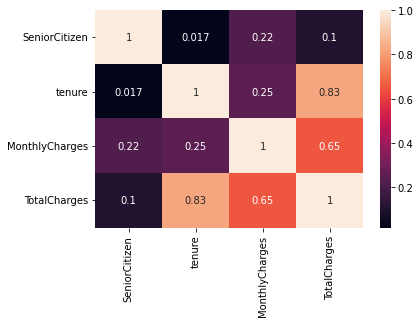

In [27]:
sns.heatmap(datacopy1[num_feats].corr(), annot=True) 

We can ignore the small amount of multi collinearity of features.

## Plotting distibution of individual predictors by churn

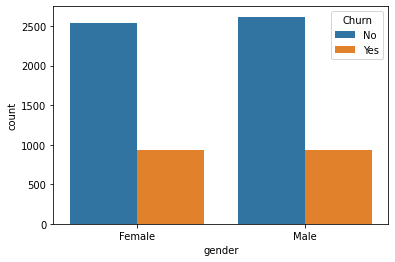

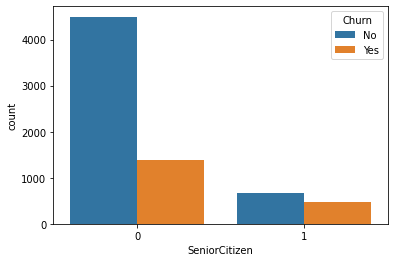

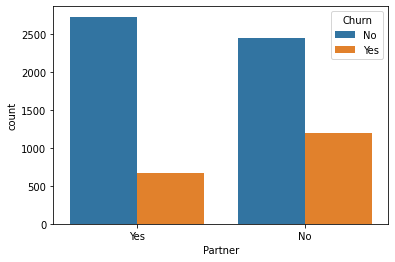

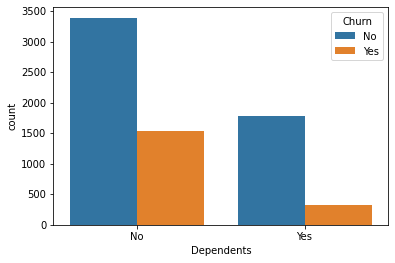

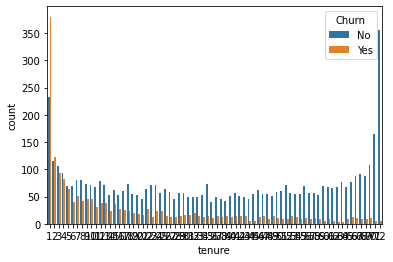

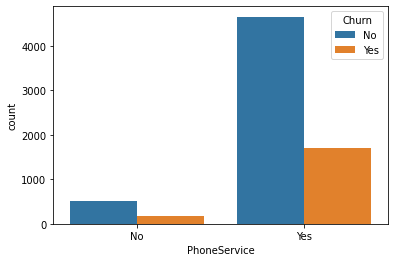

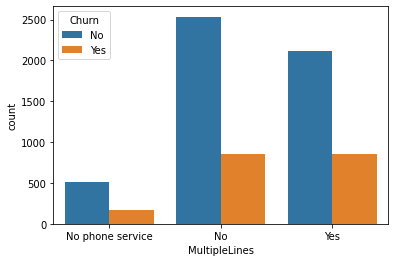

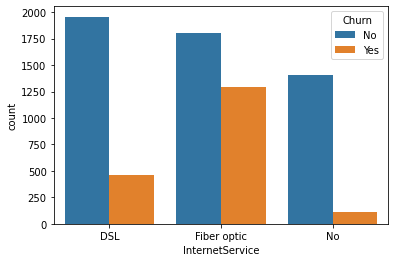

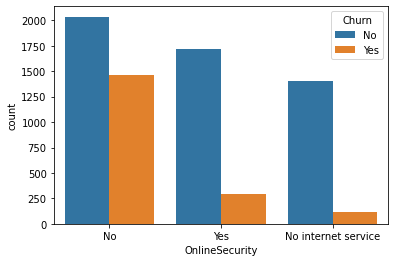

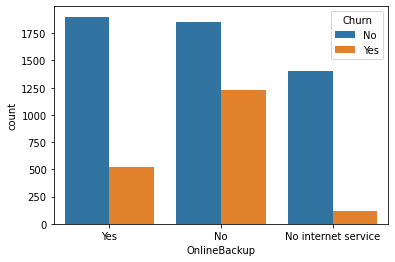

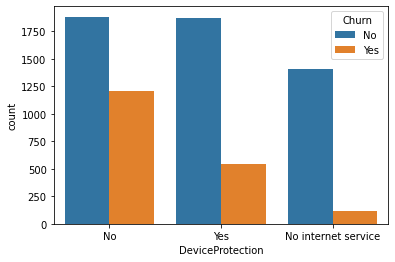

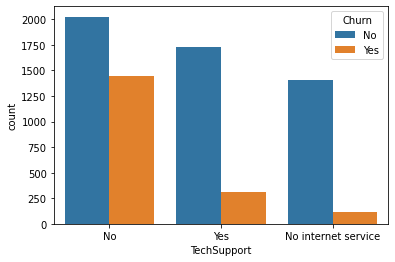

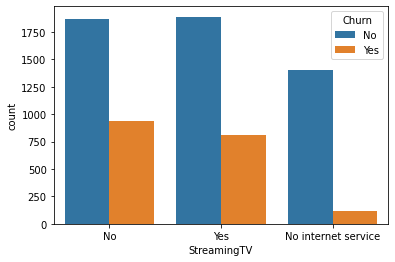

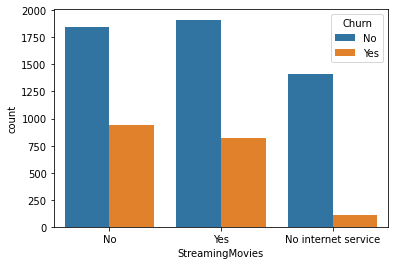

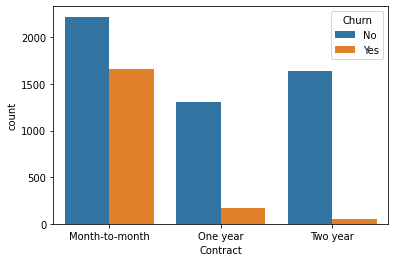

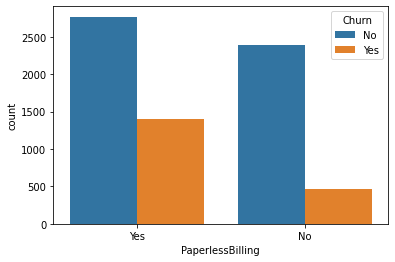

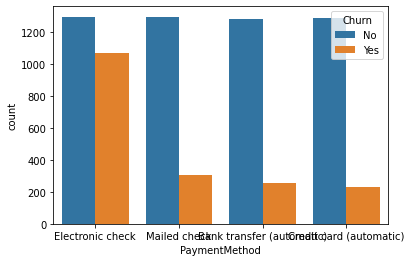

In [28]:
for i, predictor in enumerate(df1.drop(columns=['Churn', 'TotalCharges', 'MonthlyCharges'])):
    plt.figure(i)
    sns.countplot(data=df1, x=predictor, hue='Churn')

In [29]:
# Importing the Plotly Libraries.

from plotly.offline import iplot
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import seaborn as sns

### - Client Churn Distribution

In [30]:
# Plotting the pie-chart for the Client Churn Prediction.
pie_plot(df1["Churn"].value_counts(), plot_title="<b>Client Churn Distribution<b>")

## Plotting the side by side histogram for Customer Leaving and Not Leaving w.r.t their **TENURE**

/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3208: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.



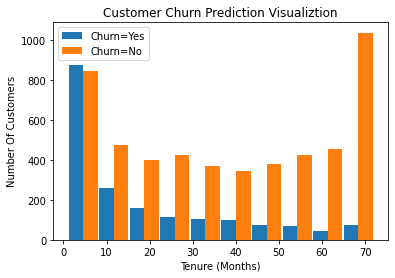

In [31]:
tenure_churn_no = df1[df1.Churn=='No'].tenure
tenure_churn_yes = df1[df1.Churn=='Yes'].tenure

plt.xlabel("Tenure (Months)")
plt.ylabel("Number Of Customers")
plt.title("Customer Churn Prediction Visualiztion")

plt.hist([tenure_churn_yes, tenure_churn_no], rwidth=0.95, label=['Churn=Yes','Churn=No'])
plt.legend()

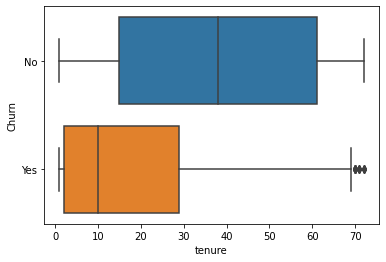

In [32]:
sns.boxplot(x = 'tenure', y = 'Churn', data = df1)
plt.show()

## Plotting the side by side histogram for Customer Leaving and not leaving w.r.t their **Monthly Charges**

/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3208: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.



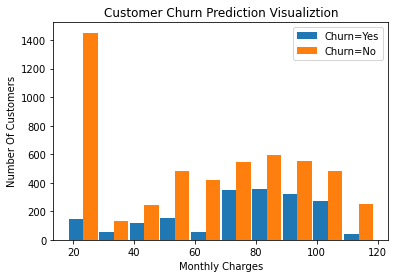

In [33]:
mc_churn_no = df1[df1.Churn=='No'].MonthlyCharges      
mc_churn_yes = df1[df1.Churn=='Yes'].MonthlyCharges      

plt.xlabel("Monthly Charges")
plt.ylabel("Number Of Customers")
plt.title("Customer Churn Prediction Visualiztion")

plt.hist([mc_churn_yes, mc_churn_no], rwidth=0.95,label=['Churn=Yes','Churn=No'])
plt.legend()

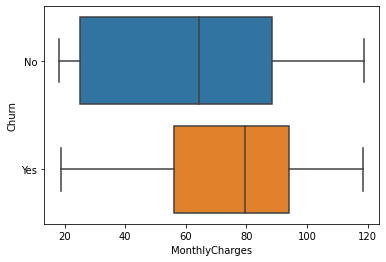

In [34]:
sns.boxplot(x = 'MonthlyCharges', y = 'Churn', data = df1)
plt.show()

 ## Plotting for Customer Leaving and not leaving w.r.t their **Contract Type**

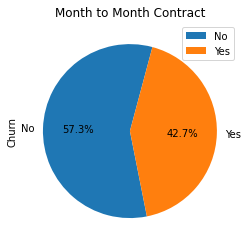

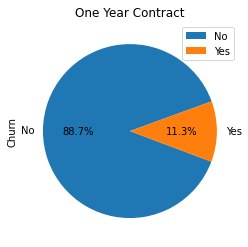

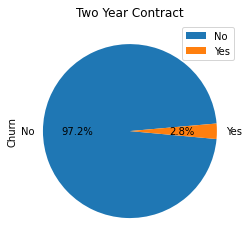

In [35]:
pie_Contract_m2m = pd.DataFrame(df1[df1['Contract'] == "Month-to-month"]['Churn'].value_counts())
pie_Contract_m2m.plot.pie(subplots=True, labels = pie_Contract_m2m.index.values, autopct='%1.1f%%', startangle= 75)
plt.title('Month to Month Contract')
plt.gca().set_aspect('equal')

pie_Contract_1y = pd.DataFrame(df1[df1['Contract'] == "One year"]['Churn'].value_counts())
pie_Contract_1y.plot.pie(subplots=True, labels = pie_Contract_1y.index.values, autopct='%1.1f%%', startangle= 20)
plt.title('One Year Contract')
plt.gca().set_aspect('equal')

pie_Contract_2y = pd.DataFrame(df1[df1['Contract'] == "Two year"]['Churn'].value_counts())
pie_Contract_2y.plot.pie(subplots=True, labels = pie_Contract_2y.index.values, autopct='%1.1f%%', startangle= 5)
plt.title('Two Year Contract')
plt.gca().set_aspect('equal')

plt.show()

 ## Plotting for Customer Leaving and not leaving w.r.t their **Gender**

<Figure size 1080x360 with 0 Axes>

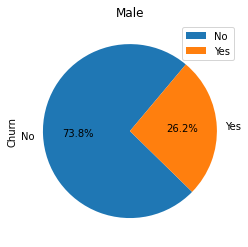

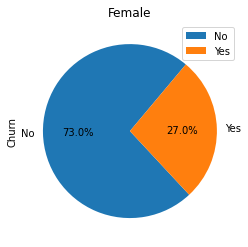

In [36]:
plt.figure(figsize=(15,5))
pie_Gender_M = pd.DataFrame(df1[df1['gender'] == "Male"]['Churn'].value_counts())
pie_Gender_M.plot.pie(subplots = True, labels = pie_Gender_M.index.values, autopct='%1.1f%%', startangle= 50)
plt.title('Male')
plt.gca().set_aspect('equal')

pie_Gender_F = pd.DataFrame(df1[df1['gender'] == "Female"]['Churn'].value_counts())
pie_Gender_F.plot.pie(subplots = True,  labels = pie_Gender_F.index.values, autopct='%1.1f%%', startangle= 50)
plt.title('Female')

plt.gca().set_aspect('equal')
plt.show() 

 ## Plotting for Customer Leaving and not leaving w.r.t their **Dependents**

<Figure size 1080x360 with 0 Axes>

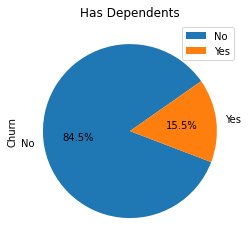

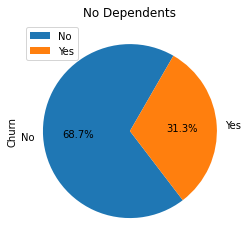

In [37]:
plt.figure(figsize=(15,5))
pie_Dependents_Y = pd.DataFrame(df1[df1['Dependents'] == 'Yes']['Churn'].value_counts())
pie_Dependents_Y.plot.pie(subplots = True,  labels = pie_Dependents_Y.index.values, autopct='%1.1f%%', startangle= 35)
plt.title('Has Dependents')
plt.gca().set_aspect('equal')

pie_Dependents_N = pd.DataFrame(df1[df1['Dependents'] == 'No']['Churn'].value_counts())
pie_Dependents_N.plot.pie(subplots = True,  labels = pie_Dependents_N.index.values, autopct='%1.1f%%', startangle= 60)
plt.title('No Dependents')

plt.gca().set_aspect('equal')
plt.show() 

# IV- Data Preprocessing

Creating function to look at the unique values of each column.

In [38]:
#This function will search and print for all the unique values in each column.
def print_unique_col_values(dataframe):
       for column in dataframe:
            if dataframe[column].dtypes=='object':
                print(f'{column}: {dataframe[column].unique()}') 

In [39]:
print_unique_col_values(df1)

gender: ['Female' 'Male']
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
PhoneService: ['No' 'Yes']
MultipleLines: ['No phone service' 'No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes' 'No internet service']
OnlineBackup: ['Yes' 'No' 'No internet service']
DeviceProtection: ['No' 'Yes' 'No internet service']
TechSupport: ['No' 'Yes' 'No internet service']
StreamingTV: ['No' 'Yes' 'No internet service']
StreamingMovies: ['No' 'Yes' 'No internet service']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn: ['No' 'Yes']


We can see that some of the columns have **no internet service** or **no phone service**, that can be replaced with a simple **No**

In [40]:
df1.replace('No internet service','No',inplace=True)
df1.replace('No phone service','No',inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5244: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Again printing the column's unique values.

In [41]:
print_unique_col_values(df1)

gender: ['Female' 'Male']
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
PhoneService: ['No' 'Yes']
MultipleLines: ['No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes']
OnlineBackup: ['Yes' 'No']
DeviceProtection: ['No' 'Yes']
TechSupport: ['No' 'Yes']
StreamingTV: ['No' 'Yes']
StreamingMovies: ['No' 'Yes']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn: ['No' 'Yes']


Converting Yes to 1 and No to 0.

In [42]:
yes_no_columns = ['Partner','Dependents','PhoneService','MultipleLines','OnlineSecurity','OnlineBackup',
                  'DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaperlessBilling','Churn']
for col in yes_no_columns:
    df1[col].replace({'Yes': 1,'No': 0},inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:6619: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [43]:
for col in df1:
    print(f'{col}: {df1[col].unique()}') 

gender: ['Female' 'Male']
SeniorCitizen: [0 1]
Partner: [1 0]
Dependents: [0 1]
tenure: [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService: [0 1]
MultipleLines: [0 1]
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: [0 1]
OnlineBackup: [1 0]
DeviceProtection: [0 1]
TechSupport: [0 1]
StreamingTV: [0 1]
StreamingMovies: [0 1]
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: [1 0]
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges: [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges: [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn: [0 1]


Also converting genders: Male to 0 and Female to 1.

In [44]:
df1['gender'].replace({'Female':1,'Male':0},inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:6619: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [45]:
df1.gender.unique()

array([1, 0])

### One Hot Encoding for Categorical Columns

In [46]:
df2 = pd.get_dummies(data=df1, columns=['InternetService','Contract','PaymentMethod'])
df2.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn', 'InternetService_DSL', 'InternetService_Fiber optic', 'InternetService_No', 'Contract_Month-to-month', 'Contract_One year', 'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)', 'PaymentMethod_Credit card (automatic)', 'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'], dtype='object')

In [47]:
df2.sample(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
4372,0,0,1,1,1,1,0,0,0,0,0,0,0,1,20.15,20.15,0,0,0,1,1,0,0,1,0,0,0
6982,1,0,1,1,72,1,0,1,1,1,1,0,1,1,74.35,5237.40,0,1,0,0,0,0,1,0,0,1,0
4721,0,0,0,0,1,1,0,0,0,0,0,0,0,0,20.25,20.25,1,0,0,1,1,0,0,0,0,0,1
5853,0,0,1,0,62,1,1,1,1,0,0,0,1,0,96.10,6001.45,0,0,1,0,0,1,0,0,0,1,0
5604,0,0,0,0,17,1,0,0,0,0,0,0,0,1,70.80,1207.00,0,0,1,0,1,0,0,0,0,1,0


In [48]:
df2.dtypes

gender                                       int64
SeniorCitizen                                int64
Partner                                      int64
Dependents                                   int64
tenure                                       int64
PhoneService                                 int64
MultipleLines                                int64
OnlineSecurity                               int64
OnlineBackup                                 int64
DeviceProtection                             int64
TechSupport                                  int64
StreamingTV                                  int64
StreamingMovies                              int64
PaperlessBilling                             int64
MonthlyCharges                             float64
TotalCharges                               float64
Churn                                        int64
InternetService_DSL                          uint8
InternetService_Fiber optic                  uint8
InternetService_No             

Scaling the columns; **Tenure, Monthly Charges and Total Charges** columns in the range 0 to 1.

In [49]:
cols_to_scale = ['tenure','MonthlyCharges','TotalCharges']

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df2[cols_to_scale] = scaler.fit_transform(df2[cols_to_scale])

In [50]:
df2.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,0,1,0,0.000000,0,0,0,1,0,0,0,0,1,0.115423,0.001275,0,1,0,0,1,0,0,0,0,1,0
1,0,0,0,0,0.464789,1,0,1,0,1,0,0,0,0,0.385075,0.215867,0,1,0,0,0,1,0,0,0,0,1
2,0,0,0,0,0.014085,1,0,1,1,0,0,0,0,1,0.354229,0.010310,1,1,0,0,1,0,0,0,0,0,1
3,0,0,0,0,0.619718,0,0,1,0,1,1,0,0,0,0.239303,0.210241,0,1,0,0,0,1,0,1,0,0,0
4,1,0,0,0,0.014085,1,0,0,0,0,0,0,0,1,0.521891,0.015330,1,0,1,0,1,0,0,0,0,1,0


## Splitting the Dataset to Test and Train Dataset

In [51]:
X = df2.drop('Churn',axis='columns')
y = df2['Churn']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=5)

In [52]:
X_train.shape

(5625, 26)

In [53]:
X_test.shape

(1407, 26)

In [54]:
X_train[:10]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
5664,1,1,0,0,0.126761,1,0,0,0,1,0,0,1,1,0.660199,0.097709,0,1,0,1,0,0,0,1,0,0
101,1,0,1,1,0.000000,1,0,0,0,0,0,0,0,0,0.011940,0.000075,0,0,1,1,0,0,0,0,1,0
2621,0,0,1,0,0.985915,1,0,0,1,1,1,1,1,1,0.605473,0.639978,1,0,0,0,0,1,0,1,0,0
392,1,1,0,0,0.014085,1,0,0,0,0,0,0,0,1,0.259204,0.008135,1,0,0,1,0,0,0,0,1,0
1327,0,0,1,0,0.816901,1,1,0,0,1,0,1,1,1,0.808458,0.685703,0,1,0,0,1,0,1,0,0,0
3607,1,0,0,0,0.169014,1,0,1,0,0,1,0,0,0,0.367164,0.083556,1,0,0,0,1,0,0,0,0,1
2773,0,0,1,0,0.323944,0,0,0,0,1,0,0,0,0,0.107960,0.077221,1,0,0,1,0,0,0,0,1,0
1936,1,0,1,0,0.704225,1,0,1,1,0,1,0,0,1,0.420398,0.360760,1,0,0,0,1,0,1,0,0,0
5387,0,0,0,0,0.042254,0,0,0,0,0,1,0,0,0,0.121891,0.011493,1,0,0,1,0,0,0,0,1,0
4331,0,0,0,0,0.985915,1,1,0,0,0,0,0,0,0,0.072637,0.216859,0,0,1,0,0,1,1,0,0,0


In [55]:
len(X_train.columns)

26

## V- Model Building and Evaluation

Importing the Keras and Tensorflow Libraries

In [56]:
import tensorflow as tf
from tensorflow import keras

![image.png](attachment:image.png)

Building the ANN Model in Keras

In [57]:

model = keras.Sequential([
    keras.layers.Dense(26, input_shape=(26,), activation='relu'),
    keras.layers.Dense(20, activation='relu'),
    keras.layers.Dense(14, activation='relu'),
    keras.layers.Dense(8, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

mdl = model.fit(X_train, y_train, epochs=100, )






Epoch 1/100
176/176 [==============================] - 1s 2ms/step - loss: 0.4809 - accuracy: 0.7643
Epoch 2/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4250 - accuracy: 0.7973
Epoch 3/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4188 - accuracy: 0.8004
Epoch 4/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4148 - accuracy: 0.8021
Epoch 5/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4122 - accuracy: 0.8053
Epoch 6/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4094 - accuracy: 0.8098
Epoch 7/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4060 - accuracy: 0.8092
Epoch 8/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4059 - accuracy: 0.8048
Epoch 9/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4034 - accuracy: 0.8103
Epoch 10/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4042 - accura

### Evaluating the Model

In [58]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 26)                702       
                                                                 
 dense_1 (Dense)             (None, 20)                540       
                                                                 
 dense_2 (Dense)             (None, 14)                294       
                                                                 
 dense_3 (Dense)             (None, 8)                 120       
                                                                 
 dense_4 (Dense)             (None, 1)                 9         
                                                                 
Total params: 1,665
Trainable params: 1,665
Non-trainable params: 0
_________________________________________________________________


In [59]:
yp = model.predict(X_test)
yp[:5]

array([[1.0868138e-01],
       [5.6010205e-01],
       [1.4734268e-04],
       [8.2915217e-01],
       [5.4033560e-01]], dtype=float32)

In [60]:
y_pred = []
for element in yp:
    if element > 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

In [61]:
y_pred[:10]

[0, 1, 0, 1, 1, 1, 0, 0, 0, 0]

In [62]:
y_test[:10]

2660    0
744     0
5579    1
64      1
3287    1
816     1
2670    0
5920    0
1023    0
6087    0
Name: Churn, dtype: int64

In [63]:
from sklearn.metrics import confusion_matrix , classification_report

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.80      0.89      0.84       999
           1       0.63      0.47      0.54       408

    accuracy                           0.77      1407
   macro avg       0.72      0.68      0.69      1407
weighted avg       0.75      0.77      0.76      1407



Text(69.0, 0.5, 'Truth (Actual Values)')

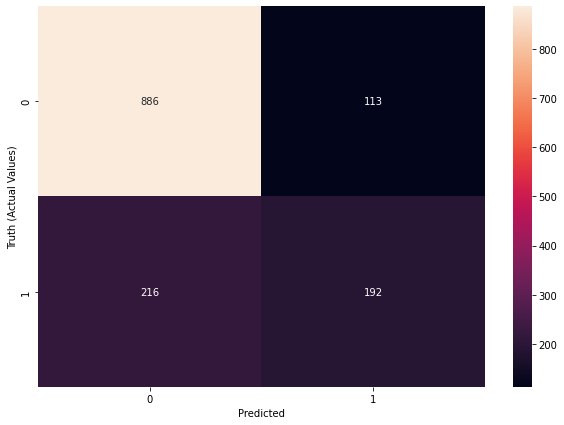

In [64]:
import seaborn as sn
cm = confusion_matrix(y_test,y_pred)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth (Actual Values)')

![cm1.JPG](attachment:cm1.JPG)

In [65]:
y_test.shape

(1407,)

In [66]:
tp = cm[0,0]
fn = cm[0,1]
fp = cm[1,0]
tn = cm[1,1]
tot_pred = tp+fn+fp+tn

In [67]:
tot_pred

1407

In [68]:
#calculated_accuracy 
round((tp+tn)/(tot_pred),2)

0.77

In [69]:
# Precision for Not Churn
round((tp)/(tp+fp),2)

0.8

In [70]:
# Recall for Not Churn
round((tp)/(tp+fn),2)

0.89

In [71]:
# Precision for Churn
round((tn)/(tn+fn),2)

0.63

In [72]:
# Recall for Churn 0.5
round((tn)/(fp+tn),2)

0.47

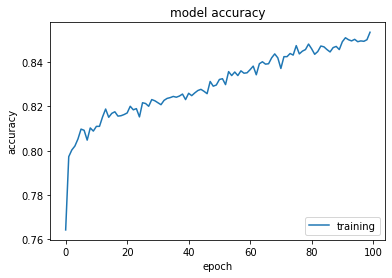

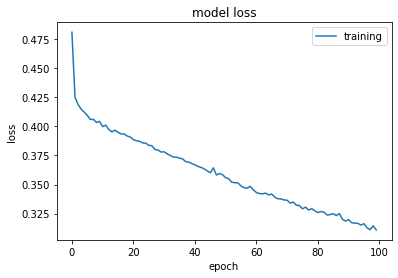

In [73]:
val_acc = [1]
def plot_accuracy(history):
    plt.plot(history.history['accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['training', 'validation'], loc='lower right')
    plt.show()

def plot_loss(history):
    plt.plot(history.history['loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['training', 'validation'], loc='upper right')
    plt.show()

# summarize history for accuracy
plot_accuracy(mdl)

# summarize history for loss
plot_loss(mdl)



Hyperparameter Tuning

In [116]:
def fit_gbc(trial, x_train, y_train, x_test, y_test):
    params = {
        'n_estimators' : (trial.suggest_int('n_estimators', 200,2000,100)),
        'max_depth' : (trial.suggest_int('max_depth', 4, 10)),
        'learning_rate' : trial.suggest_loguniform('learning_rate', 0.008, 0.8),
        }
    model = GradientBoostingClassifier(**params, random_state=2021)
    model.fit(X_train, y_train)
    
    y_train_pred = model.predict(X_train)
    
    y_test_pred = model.predict(X_test)
    
    log = {
        "train accuracy": accuracy_score(y_train, y_train_pred),
        "valid accuracy": accuracy_score(y_test, y_test_pred)
    }
    
    return model, log

In [117]:
gbc_params = {'n_estimators': 1700, 
              'max_depth': 4, 
              'learning_rate': 0.009751953178333802}


In [133]:
from sklearn.model_selection import KFold,cross_val_score
def cross_val(X, y, model, params, folds =5):

    kf = KFold(n_splits=folds, shuffle=True, random_state=21)
    for fold, (train_idx, test_idx) in enumerate(kf.split(X, y)):
        print(f"Fold: {fold}")
        x_train, y_train = X.iloc[train_idx], y.iloc[train_idx]
        x_test, y_test = X.iloc[test_idx], y.iloc[test_idx]

        alg = model(**params)
        alg.fit(x_train, y_train,)
        pred = alg.predict(x_test)
        # accuracy = accuracy_score(y_test, y_pred)
        # print(f" accuracy_score: {accuracy}")
        # print("-"*50)
    
    return alg

In [121]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_feature_importance(importance,names,model_type):

    #Create arrays from feature importance and feature names
    feature_importance = np.array(importance)
    feature_names = np.array(names)

    #Create a DataFrame using a Dictionary
    data={'feature_names':feature_names,'feature_importance':feature_importance}
    fi_df = pd.DataFrame(data)

    #Sort the DataFrame in order decreasing feature importance
    fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)

    #Define size of bar plot
    plt.figure(figsize=(10,8))
    #Plot Searborn bar chart
    sns.barplot(x=fi_df['feature_importance'], y=fi_df['feature_names'])
    #Add chart labels
    plt.title(model_type + 'FEATURE IMPORTANCE')
    plt.xlabel('FEATURE IMPORTANCE')
    plt.ylabel('FEATURE NAMES')

Fold: 0
Fold: 1
Fold: 2
Fold: 3
Fold: 4


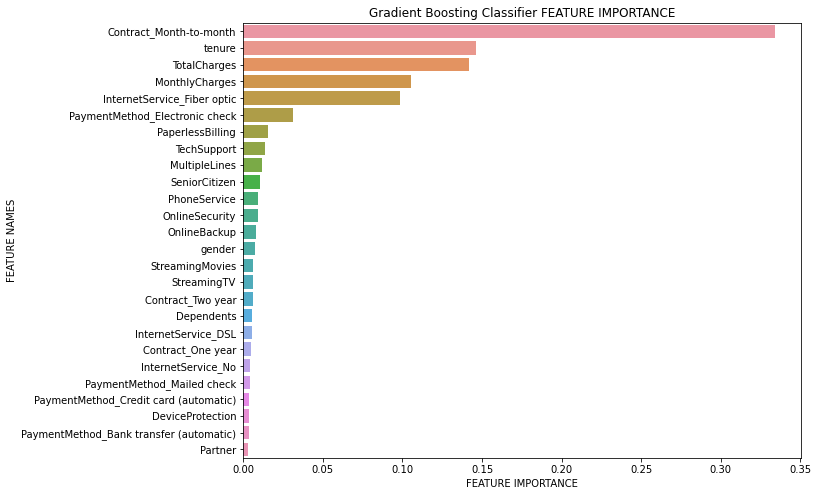

In [134]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = cross_val(X, y, GradientBoostingClassifier, gbc_params)
plot_feature_importance(gbc.feature_importances_,X.columns,'Gradient Boosting Classifier ')